In [1]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy as np
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "setup code")

# Drawing samples from a gaussian

Suppose we draw a random vector from a 2D gaussian distribution

$$ \mathbf{y} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}),~\boldsymbol{\mu} = \begin{pmatrix}
2 \\
2 \\
\end{pmatrix}, \boldsymbol{\Sigma} = \begin{pmatrix}
2 & 1\\
1 & 2\\
\end{pmatrix}$$

and plot its entries against their index, as shown bellow. The left plot shows a contour plot of the distribution and also the sampled vector $(y_1, y_2)$. On the right plot, we've taken the two vector components $y_1$ and $y_2$ and plotted them against their index $d = 1, 2$. It may appear that this representation does not have much to offer, however the reason for adopting it will become apparent shortly. You can try rerunning the code to see the different samples.

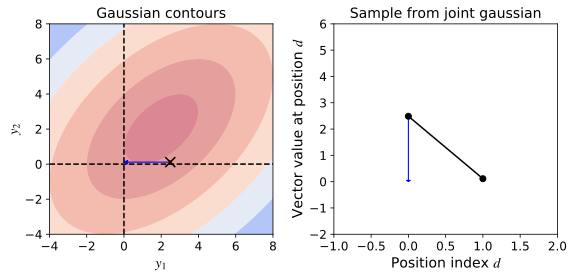

In [2]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix
samples = np.random.multivariate_normal(mean, cov) # draw samples from multivariate normal

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))
plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
plt.arrow(samples[0], samples[1], -samples[0], 0, head_width = 0.2, head_length = 0.2,
          color = 'b', length_includes_head = True)
plt.arrow(samples[0], samples[1], 0, -samples[1], head_width = 0.2, head_length = 0.2,
          color = 'r', length_includes_head = True)
plt.plot([-4, 8], [0, 0], '--', color = 'black')
plt.plot([0, 0], [-4, 8], '--', color = 'black')
plt.scatter(samples[0], samples[1], marker = 'x', s = 100, c = 'black', zorder = 2)
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.arrow(0, samples[0], 0, -samples[0], head_width = 0.05, head_length = 0.05,
          color = 'b', length_includes_head = True)
plt.arrow(1, samples[1], 0, -samples[1], head_width = 0.05, head_length = 0.05,
          color = 'r', length_includes_head = True)
plt.scatter(indices, samples, c = 'black', zorder = 2)
plt.plot(indices, samples, 'black')
plt.xlim([-1, 2])
plt.ylim([-2, 6])
beautify_plot({'title': 'Sample from joint gaussian', 'x':'Position index $d$',
               'y': 'Vector value at position $d$'})
plt.tight_layout()
plt.show()

toggle_code()

We can also take several samples at once and look at them in either representation. You can change the mean vector and the covariance matrix (remember it must be symmetric and positive definite), and see how the samples change.

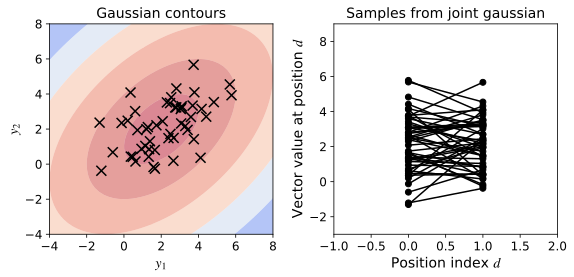

In [3]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.xlim([-1, 2])
plt.ylim([-3, 9])
beautify_plot({'title': 'Samples from joint gaussian', 'x':'Position index $d$',
               'y': 'Vector value at position $d$'})

for i in range(50):
    samples = np.random.multivariate_normal(mean, cov) # draw samples from multivariate normal
    
    plt.subplot(121)
    plt.scatter(samples[0], samples[1], marker = 'x', s = 100, c = 'black', zorder = 2)
    
    plt.subplot(122)
    plt.scatter(indices, samples, c = 'black', zorder = 2)
    plt.plot(indices, samples, 'black')

plt.tight_layout()
plt.show()

toggle_code()

Now, if we fix the value of $y_1$, then the conditional distribution $p(y_2|y_1)$ is also gaussian. In general, if $\mathbf{y}$ is a gaussian-distributed vector and vectors $\mathbf{y}_1$, $\mathbf{y}_2$ partition it, in the sense of

$$ \mathbf{y} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}),~\mathbf{y} = \begin{pmatrix}
\mathbf{y}_1 \\
\mathbf{y}_2 \\
\end{pmatrix},~\boldsymbol{\mu} = \begin{pmatrix}
\boldsymbol{\mu}_1 \\
\boldsymbol{\mu}_2 \\
\end{pmatrix}, \boldsymbol{\Sigma} = \begin{pmatrix}
\boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
\boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}\\
\end{pmatrix},$$

then the conditional distribution $p(\mathbf{y}_2 | \mathbf{y}_1)$ is (you are encouraged to derive this on your own):

$$ p(\mathbf{y}_2 | \mathbf{y}_1) = \mathcal{N}(\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1}, \boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1})$$

\begin{align}
\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1} &= \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \\
\boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1} &= \boldsymbol{\Lambda}_{22}^{-1}
\end{align}

<details>
<summary>Derivation for the conditional of a gaussian $p(\mathbf{y}_2 | \mathbf{y}_1)$</summary>
<div>
    From the product rule:
    $$ p(\mathbf{y}_2 | \mathbf{y}_1) = \frac{p(\mathbf{y}_2, \mathbf{y}_1)}{p(\mathbf{y}_1)} $$
    Noting that $\mathbf{y}_1$ is a given vector so $p(\mathbf{y}_1)$ is simply a fixed number and also noting that $p(\mathbf{y}_2, \mathbf{y}_1)$ is a gaussian, it follows that $p(\mathbf{y}_2 | \mathbf{y}_1)$ is also a gaussian. Therefore the mean and covariance of the conditional, are sufficient statistics for the conditional (i.e. enough to determine the distribution). To calculate these, let's write out the joint:
    
    \begin{align} p(\mathbf{y}_1, \mathbf{y}_2) \propto \exp \bigg( &-\frac{1}{2}(\mathbf{y}_1 - \boldsymbol{\mu}_1)^\top \boldsymbol{\Lambda}_{11} (\mathbf{y}_1 - \boldsymbol{\mu}_1) -\frac{1}{2}(\mathbf{y}_1 - \boldsymbol{\mu}_1)^\top \boldsymbol{\Lambda}_{12} (\mathbf{y}_2 - \boldsymbol{\mu}_2)\\
    &-\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_2)^\top \boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) -\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_2)^\top \boldsymbol{\Lambda}_{22}(\mathbf{y}_2 - \boldsymbol{\mu}_2)  \bigg)
    \end{align}
    
    up to a normalising constant. Since $p(\mathbf{y}_2 | \mathbf{y}_1)$ is gaussian, we can write it out as
    
    $$ p(\mathbf{y}_2 | \mathbf{y}_1) = \mathcal{N}(\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1}, \boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1}) \propto \exp \bigg( -\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_{\mathbf{y}_2 | \mathbf{y}_1})^\top\boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1}^{-1}(\mathbf{y}_2 - \boldsymbol{\mu}_{\mathbf{y}_2 | \mathbf{y}_1}) \bigg).$$
    
    and obtain the mean and covariance by comparing terms. Equating the terms quadratic in $\mathbf{y}_2$:
    
    $$ \mathbf{y}_2^\top\boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1}^{-1}\mathbf{y}_2 = \mathbf{y}_2^\top\boldsymbol{\Lambda}_{22}\mathbf{y}_2 \implies \boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1} = \boldsymbol{\Lambda}_{22}^{-1}$$
    
    Equating the terms linear in $\mathbf{y}_2$:
    
    $$\mathbf{y}_2^\top\boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1}^{-1}\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1} = \mathbf{y}_2^\top \boldsymbol{\Lambda}_{22}\boldsymbol{\mu}_2 + \mathbf{y}_2^\top \boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \implies \boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1} = \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1)$$
    
    obtaining the mean and covariance we advertised at the start.
</div>
</details>

With these expressions, we can sample $y_2$ given $y_1 = 3$ in our 2-dimensional example. Again, try tweaking the value of `y1` and observe the changes.

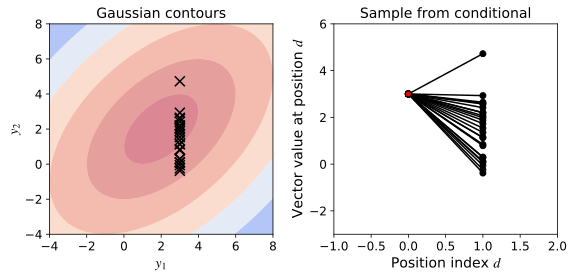

In [4]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix
prec = np.linalg.inv(cov) # corresponding precision matrix
y1 = 3 # suppose we fix y2 = 3 (play with this and look at the changes)

mean_cond = mean[:1] + np.linalg.inv(prec[1:, 1:]).dot(prec[:1, 1:]).dot(y1 - mean[1:])
cov_cond = np.linalg.inv(prec[1:, 1:])

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.xlim([-1, 2])
plt.ylim([-3, 6])
beautify_plot({'title': 'Sample from conditional', 'x':'Position index $d$',
               'y': 'Vector value at position $d$'})

for i in range(25):
    sample = np.random.multivariate_normal(mean_cond, cov_cond) # draw samples from multivariate normal
    
    plt.subplot(121)
    plt.scatter(y1, sample, marker = 'x', s = 100, c = 'black', zorder = 2)
    
    plt.subplot(122)
    plt.scatter(0, y1, color = 'red', linewidth = 1,
                edgecolor = 'black', zorder = 3)
    plt.scatter(1, sample, c = 'black', zorder = 2)
    plt.plot([0, 1], [y1, sample], 'black')

plt.tight_layout()
plt.show()

toggle_code()

The reason for using a 2-dimensional gaussian up to now was to be able to visualise it, but we can repeat the same sampling process using more dimensions. Consider the following 10-dimensional covariance matrix:

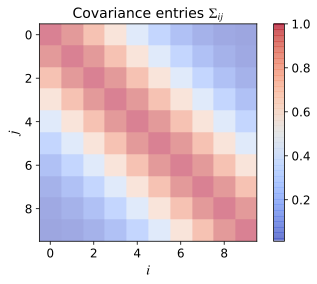

In [5]:
indices = np.arange(0, 10)
cov = magic_covariance(indices, scale = 3)

np.random.multivariate_normal(np.zeros(shape = indices.shape), cov)
plt.imshow(cov, cmap = 'coolwarm', alpha = 0.5)
plt.xticks(np.arange(0, 10, 2))
plt.yticks(np.arange(0, 10, 2))
beautify_plot({'title': 'Covariance entries $\Sigma_{ij}$', 'x':'$i$', 'y': '$j$'})
plt.colorbar()
plt.show()

toggle_code()

We pulled this matrix out of a hat, without giving any explanation of how it was constructed. We'll explain this later, but for the moment note its rough struture: $y$'s which have similar index values $i \approx j$ have been given a high covariance whereas ones with significantly different indices $i \not\approx j$ have been given a low covariance. Let's go ahead with our original goal of making some samples. Try rerunning the code ot get a feel for the samples we can obtain.

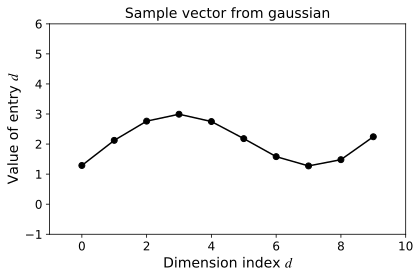

In [6]:
indices = np.arange(0, 10)
mean = np.ones_like(indices)*2 # mean of multivariate normal
cov = magic_covariance(indices, scale = 3, sigma = 2) # get the magic covariance matrix
samples = np.random.multivariate_normal(mean, cov) # draw samples from multivariate normal

# plotting code - understanding this is uncecessary
plt.figure(figsize = (6, 4))
plt.scatter(indices, samples, c = 'black', zorder = 2)
plt.plot(indices, samples, 'black')
plt.xlim([-1, 10])
plt.ylim([-1, 6])
beautify_plot({'title': 'Sample vector from gaussian', 'x':'Dimension index $d$',
               'y': 'Value of entry $d$'})
plt.tight_layout()
plt.show()

toggle_code()

Again, we can fix certain values of $\mathbf{y}$ and sample the rest, i.e. $\mathbf{y}_2 \sim p(\mathbf{y}_2 | \mathbf{y}_1)$. We already derived the formulae for this:

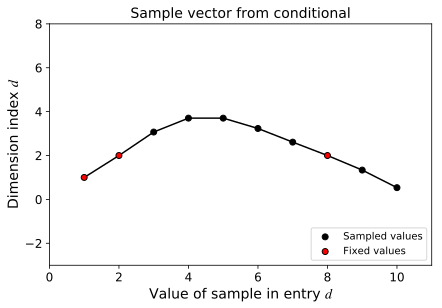

In [7]:
indices = np.arange(0, 10)
sample_idx = np.array([2, 3, 4, 5, 6, 8, 9])
fixed_idx = np.array([0, 1, 7])
cov = magic_covariance(indices, scale = 3, sigma = 2) # get the magic covariance index
prec = np.linalg.inv(cov) # calculate precision from covariance

y_given = np.array([[1, 2, 2]]).T # values of y_1, y_2 and y_8 to condition on
prec_22 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = fixed_idx, axis = 1)
prec_21 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = sample_idx, axis = 1)
mean = 2 - np.linalg.inv(prec_22).dot(prec_21.dot(y_given - 2)) # conditional dist. mean

samples = np.random.multivariate_normal(mean.reshape(-1), np.linalg.inv(prec_22)) # draw samples from condtional

# plotting code - understanding this is uncecessary
plt.figure(figsize = (6, 4))

plt.scatter(sample_idx + 1, samples, c = 'black', zorder = 2, label = 'Sampled values')
plt.scatter(fixed_idx + 1, y_given, color = 'red', linewidth = 1,
            edgecolor = 'black', zorder = 3, label = 'Fixed values')

all_values = np.zeros(shape = (len(sample_idx) + len(fixed_idx),))
all_values[sample_idx] = samples
all_values[fixed_idx] = y_given[:, 0]
plt.plot(np.arange(1, len(all_values) + 1), all_values, 'black')

plt.xlim([0, 11])
plt.ylim([-3, 8])
plt.tight_layout()
plt.gca().legend(loc = 4)
beautify_plot({'title': 'Sample vector from conditional',
               'x':'Value of sample in entry $d$',
               'y': 'Dimension index $d$'})
plt.show()

toggle_code()

We can repeat this sampling many times to obtain something like:

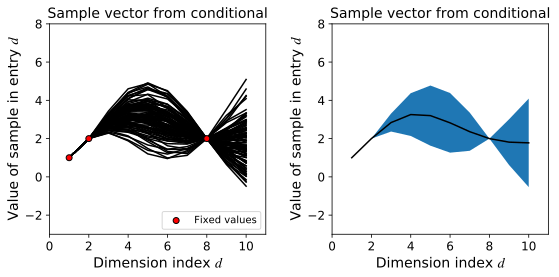

In [8]:
indices = np.arange(0, 10)
sample_idx = np.array([2, 3, 4, 5, 6, 8, 9])
fixed_idx = np.array([0, 1, 7])
cov = magic_covariance(indices, scale = 3, sigma = 2) # get the magic covariance index
prec = np.linalg.inv(cov) # calculate precision from covariance

y_given = np.array([[1, 2, 2]]).T # values of y_1, y_2 and y_8 to condition on
prec_22 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = fixed_idx, axis = 1)
prec_21 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = sample_idx, axis = 1)
mean = 2 - np.linalg.inv(prec_22).dot(prec_21.dot(y_given - 2)) # conditional dist. mean

samples, no_samples = [], 100
for i in range(no_samples):
    sample = np.random.multivariate_normal(mean.reshape(-1), np.linalg.inv(prec_22))
    samples.append(sample)
    
    
# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
plt.scatter(fixed_idx + 1, y_given, color = 'red', linewidth = 1,
            edgecolor = 'black', zorder = 3, label = 'Fixed values')

all_values = []
for i in range(no_samples):
    sample = samples[i]
    all_values_ = np.zeros(shape = (len(sample_idx) + len(fixed_idx),))
    all_values_[sample_idx] = sample
    all_values_[fixed_idx] = y_given[:, 0]
    all_values.append(all_values_)
    
    plt.plot(np.arange(1, len(all_values_) + 1), all_values_, 'black')
    
all_values = np.array(all_values)
    
plt.xlim([0, 11])
plt.ylim([-3, 8])
plt.gca().legend(loc = 4)
beautify_plot({'title': 'Sample vector from conditional',
               'x':'Dimension index $d$',
               'y': 'Value of sample in entry $d$'})

plt.subplot(122)

means = all_values.mean(axis = 0)
stds = all_values.var(axis = 0)**0.5
plt.plot(np.arange(1, all_values.shape[1] + 1), means, color = 'black')
plt.fill_between(np.arange(1, all_values.shape[1] + 1), means - 2*stds, means + 2*stds)
plt.xlim([0, 11])
plt.ylim([-3, 8])
beautify_plot({'title': 'Sample vector from conditional',
               'x':'Dimension index $d$',
               'y': 'Value of sample in entry $d$'})

plt.tight_layout()
plt.show()

toggle_code()

Of course, *we don't have to take all those samples* to figure out the mean and variance of each vector entry. We already have the mean and covariance

\begin{align}
\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1} &= \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \\
\boldsymbol{\Sigma}_{\mathbf{y}_2|\mathbf{y}_1} &= \boldsymbol{\Lambda}_{22}^{-1}
\end{align}

so if we want to know the mean and variance of a particular entry, say $(\mathbf{y}_{2})_d = \mathbf{y}_{2,d}$, we can integrate out all other entries:

$$ p(\mathbf{y}_{2,d}|\mathbf{y}_1) = \int p(\mathbf{y}_2|\mathbf{y}_1) d\mathbf{y}_{2,i\neq d}$$

where $\int ~ \cdot~ d\mathbf{y}_{2,i\neq d}$ means integrating out w.r.t. all elements of $\mathbf{y}_2$ except $d$. Since the marginal of a gaussian is gaussian, $p(\mathbf{y}_{2,d}|\mathbf{y}_1)$ will also be gaussian with mean $(\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1})_d$ and precision $\big(\boldsymbol{\Lambda}_{22}\big)_{dd}$ (you are encouraged to derive this on your own).

It is probably becoming apparent that we can use such an approach for non-linear regression. Note that although the mean $\boldsymbol{\mu}_{\mathbf{y}_2|\mathbf{y}_1}$ is a linear function of $\mathbf{y}_1$, it also depends on the mysterious covariance $\boldsymbol{\Sigma}$. $\boldsymbol{\Sigma}_{ij}$ was the covariance between the $i^{th}$ and $j^{th}$ element of the random vector and we can look at it as a discrete function $\Sigma(i, j)$, which depends on $i$ and $j$ in a complicated and non-linear way. By plotting the vector entries with the indices along the horizontal axis, we obtained a plot which looks like a function sampled at integer positions. $\Sigma(i, j)$ told us how correlated the $i^{th}$ and $j^{th}$ function values are. If we make the mental leap of substituting $\Sigma(i, j)$ with another function $k(x, x')$ which takes values on a continuous range of $x$ and $x'$, we will obtain smooth samples, and $k(x, x')$ will be telling us how correlated the function values at $x$ and $x'$ are. Gaussian Processes formalise this mental leap. We will explore then the next section but as a taster of what's to come here is GP fitted to our three datapoints.

<div class="row">
  <div class="column">
    <img src="gp_drawing_samples_illustration.svg" alt="no image :(" style="width:90%; float: center; padding: 0px; padding : 20px">
  </div>
</div>